In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os
data_folder = "/content/drive/MyDrive/veri-madenciligi-projesi/notebooks"  # <- burayı kendi Drive klasörüne göre değiştir

# Klasördeki csv dosyalarını listele
files = [f for f in os.listdir(data_folder) if f.lower().endswith('.csv')]
print("Found CSV files:", len(files))
for f in files:
    print("-", f)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found CSV files: 17
- BTC-USD.csv
- DXY.csv
- ECBDFR.csv
- STLFSI2.csv
- GDP.csv
- WALCL.csv
- PAYEMS.csv
- UNRATE.csv
- CPI.csv
- EURUSD=X.csv
- GC=F.csv
- IVV.csv
- ZQ=F.csv
- ^GSPC.csv
- FEDFUNDS.csv
- ^VIX.csv
- merged_data.csv


In [ ]:
import pandas as pd
import os

folder = "/content/drive/MyDrive/veri-madenciligi-projesi/notebooks"

for file in os.listdir(folder):
    if file.endswith(".csv"):
        path = os.path.join(folder, file)

        print("Temizleniyor:", file)

        # Dosyayı oku
        raw = pd.read_csv(path, header=None)

        # 1) "Date" satırını bul
        header_row = raw[raw.apply(lambda row: row.str.contains("Date", na=False)).any(axis=1)]

        if len(header_row) == 0:
            print("Başlık bulunamadı, atlandı:", file)
            continue

        header_index = header_row.index[0]

        # 2) Bu satırı header olarak ayarla
        new_header = raw.iloc[header_index]

        # 3) Header'dan sonraki gerçek verileri al
        df = raw[(header_index+1):]
        df.columns = new_header
        df.reset_index(drop=True, inplace=True)

        # 4) Gereksiz "NaN" satırları temizle
        df = df.dropna(subset=["Date"])

        # 5) Temiz dosyayı tekrar kaydet
        df.to_csv(path, index=False)

        print("Temizlendi:", file)

print("Tüm dosyalar temizlendi")


Temizleniyor: BTC-USD.csv
✔️ Temizlendi: BTC-USD.csv
Temizleniyor: DXY.csv
✔️ Temizlendi: DXY.csv
Temizleniyor: ECBDFR.csv
✔️ Temizlendi: ECBDFR.csv
Temizleniyor: STLFSI2.csv
✔️ Temizlendi: STLFSI2.csv
Temizleniyor: GDP.csv
✔️ Temizlendi: GDP.csv
Temizleniyor: WALCL.csv
✔️ Temizlendi: WALCL.csv
Temizleniyor: PAYEMS.csv
✔️ Temizlendi: PAYEMS.csv
Temizleniyor: UNRATE.csv
✔️ Temizlendi: UNRATE.csv
Temizleniyor: CPI.csv
✔️ Temizlendi: CPI.csv
Temizleniyor: EURUSD=X.csv
✔️ Temizlendi: EURUSD=X.csv
Temizleniyor: GC=F.csv
✔️ Temizlendi: GC=F.csv
Temizleniyor: IVV.csv
✔️ Temizlendi: IVV.csv
Temizleniyor: ZQ=F.csv
✔️ Temizlendi: ZQ=F.csv
Temizleniyor: ^GSPC.csv
✔️ Temizlendi: ^GSPC.csv
Temizleniyor: FEDFUNDS.csv
❌ Başlık bulunamadı, atlandı: FEDFUNDS.csv
Temizleniyor: ^VIX.csv
✔️ Temizlendi: ^VIX.csv
Temizleniyor: merged_data.csv
✔️ Temizlendi: merged_data.csv
🎉 Tüm dosyalar temizlendi!


In [ ]:
import pandas as pd
import os

folder = "/content/drive/MyDrive/veri-madenciligi-projesi/notebooks"

# Yahoo Finance dosyaları
broken_files = [
    "ZQ=F.csv", "IVV.csv", "GC=F.csv", "EURUSD=X.csv",
    "DXY.csv", "CPI.csv", "BTC-USD.csv", "^VIX.csv", "^GSPC.csv"
]

# Doğru Yahoo kolonları
correct_cols = ["Date","Close","High","Low","Open","Volume"]

for file in broken_files:
    path = os.path.join(folder, file)

    if not os.path.exists(path):
        print("Dosya yok:", file)
        continue

    print("Düzeltiliyor:", file)

    df = pd.read_csv(path, header=None)

    # Eğer Date ilk satırdaysa ve sütun adları yoksa
    if df.iloc[0].str.contains("Date", na=False).any():
        df = df[1:]  # Date satırını at
        df.columns = correct_cols[:len(df.columns)]  # mümkün olan kolonları ekle

        df.to_csv(path, index=False)
        print("Düzeltildi:", file)
    else:
        print("Zaten düzgün olabilir:", file)

print("Tüm bozuk dosyalar düzeltildi!")


🔧 Düzeltiliyor: ZQ=F.csv
✔️ Düzeltildi: ZQ=F.csv
🔧 Düzeltiliyor: IVV.csv
✔️ Düzeltildi: IVV.csv
🔧 Düzeltiliyor: GC=F.csv
✔️ Düzeltildi: GC=F.csv
🔧 Düzeltiliyor: EURUSD=X.csv
✔️ Düzeltildi: EURUSD=X.csv
🔧 Düzeltiliyor: DXY.csv
✔️ Düzeltildi: DXY.csv
🔧 Düzeltiliyor: CPI.csv
✔️ Düzeltildi: CPI.csv
🔧 Düzeltiliyor: BTC-USD.csv
✔️ Düzeltildi: BTC-USD.csv
🔧 Düzeltiliyor: ^VIX.csv
✔️ Düzeltildi: ^VIX.csv
🔧 Düzeltiliyor: ^GSPC.csv
✔️ Düzeltildi: ^GSPC.csv
🎉 Tüm bozuk dosyalar düzeltildi!


In [ ]:
#Date+Value seçen fonksiyon
import os
import pandas as pd
import numpy as np

data_folder = "/content/drive/MyDrive/veri-madenciligi-projesi/notebooks"


# listele
files = [f for f in os.listdir(data_folder) if f.lower().endswith('.csv')]
print("Found", len(files), "csv files.\n")

def load_and_select(path):
    df = pd.read_csv(path, dtype=str)

    df.columns = [c.strip() for c in df.columns]

    # Tarih sütunu bul
    date_candidates = ['Date','DATE','date','observation_date','date_time','timestamp','index']
    date_col = next((c for c in date_candidates if c in df.columns), None)

    # Eğer doğrudan yoksa header'ı farklı satırlarda arayalım (0-5 arası)
    if date_col is None:
        found = False
        for h in range(0,6):
            try:
                tmp = pd.read_csv(path, header=h, nrows=5, dtype=str)
                tmp.columns = [c.strip() for c in tmp.columns]
                if any([c for c in tmp.columns if c.lower().strip()=='date' or 'date' in c.lower()]):
                    date_col = [c for c in tmp.columns if 'date' in c.lower()][0]
                    df = pd.read_csv(path, header=h, dtype=str)
                    df.columns = [c.strip() for c in df.columns]
                    found = True
                    break
            except Exception:
                continue
        if not found and date_col is None:

            for c in df.columns[:3]:
                try:
                    pd.to_datetime(df[c].iloc[:5])
                    date_col = c
                    break
                except Exception:
                    pass

    if date_col is None:
        raise ValueError(f"No date-like column found in {os.path.basename(path)}")

    # Değer sütunu
    value_candidates = ['Adj Close','Adj_Close','AdjClose','Close','close','Value','VALUE','value']
    value_col = next((c for c in value_candidates if c in df.columns), None)

    if value_col is None:
        #sayısal tip dönüşümü
        for c in df.columns:
            try:
                _ = pd.to_numeric(df[c].dropna().iloc[:5])
                value_col = c
            except Exception:
                continue

    if value_col is None:
        raise ValueError(f"No numeric value column found in {os.path.basename(path)}")

    #  Sütün seçimi
    out = df[[date_col, value_col]].copy()
    out.columns = ['Date','Value']
    # parse date
    out['Date'] = pd.to_datetime(out['Date'], errors='coerce')
    out = out.dropna(subset=['Date'])
    # try convert Value to numeric.....
    out['Value'] = out['Value'].astype(str).str.replace(',','').str.strip()
    out['Value'] = pd.to_numeric(out['Value'], errors='coerce')
    # drop rows where Value is NaN
    out = out.dropna(subset=['Value'])
    # drop duplicates
    out = out.drop_duplicates(subset=['Date'], keep='last').sort_values('Date').reset_index(drop=True)
    return out

# quick test: load all & show heads
sample = {}
for f in files:
    p = os.path.join(data_folder, f)
    try:
        df = load_and_select(p)
        sample[f] = df.head(3)
    except Exception as e:
        sample[f] = f"ERROR: {e}"

# print results
for k,v in sample.items():
    print("==", k, "==")
    print(v)
    print()


Found 17 csv files.

== BTC-USD.csv ==
        Date       Value
0 2014-09-17  457.334015
1 2014-09-18  424.440002
2 2014-09-19  394.795990

== DXY.csv ==
        Date        Value
0 2014-09-17  1642.150024
1 2014-09-18  1587.500000
2 2014-09-19  1628.469971

== ECBDFR.csv ==
        Date  Value
0 2014-09-17   -0.2
1 2014-09-18   -0.2
2 2014-09-19   -0.2

== STLFSI2.csv ==
        Date   Value
0 2014-09-19 -0.6344
1 2014-09-26 -0.4354
2 2014-10-03 -0.4169

== GDP.csv ==
        Date      Value
0 2014-07-01  17804.228
1 2014-10-01  17912.079
2 2015-01-01  18063.529

== WALCL.csv ==
        Date      Value
0 2014-09-17  4449588.0
1 2014-09-24  4459050.0
2 2014-10-01  4450260.0

== PAYEMS.csv ==
        Date     Value
0 2014-09-01  139563.0
1 2014-10-01  139797.0
2 2014-11-01  140090.0

== UNRATE.csv ==
        Date  Value
0 2014-09-01    5.9
1 2014-10-01    5.7
2 2014-11-01    5.8

== CPI.csv ==
        Date      Value
0 2014-09-17  23.675552
1 2014-09-18  23.657124
2 2014-09-19  23.64823

In [ ]:
# read & merge all CSVs into one DataFrame
merged = None
for f in files:
    p = os.path.join(data_folder, f)
    try:
        df = load_and_select(p)
    except Exception as e:
        print("SKIP", f, "->", e)
        continue
    colname = os.path.splitext(f)[0]  # file name without .csv
    df = df.rename(columns={'Value': colname})
    if merged is None:
        merged = df
    else:
        merged = merged.merge(df, on='Date', how='outer')

# sort and reset
merged = merged.sort_values('Date').reset_index(drop=True)
print("Merged shape:", merged.shape)
merged.head()


SKIP merged_data.csv -> [Errno 2] No such file or directory: '/content/drive/MyDrive/veri-madenciligi-projesi/notebooks/merged_data.csv'
Merged shape: (4068, 17)


,Date,BTC-USD,DXY,ECBDFR,STLFSI2,GDP,WALCL,PAYEMS,UNRATE,CPI,EURUSD=X,GC=F,IVV,ZQ=F,^GSPC,FEDFUNDS,^VIX
0,2014-07-01,NaN,NaN,NaN,NaN,17804.228,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2014-09-01,NaN,NaN,NaN,NaN,NaN,NaN,139563.0,5.9,NaN,NaN,NaN,NaN,NaN,NaN,0.09,NaN
2,2014-09-17,457.334015,1642.150024,-0.2,NaN,NaN,4449588.0,NaN,NaN,23.675552,1.295908,1234.400024,166.160706,99.910004,2001.569946,NaN,12.65
3,2014-09-18,424.440002,1587.500000,-0.2,NaN,NaN,NaN,NaN,NaN,23.657124,1.285000,1225.699951,167.032440,99.910004,2011.359985,NaN,12.03
4,2014-09-19,394.795990,1628.469971,-0.2,-0.6344,NaN,NaN,NaN,NaN,23.648230,1.292006,1215.300049,166.835114,99.910004,2010.400024,NaN,12.11


In [ ]:
# Temel eksik doldurma
merged_filled = merged.copy()
merged_filled = merged_filled.set_index('Date')

# forward fill then back fill
merged_filled = merged_filled.ffill().bfill()

# Eğer bazı sütunlar quarter/ monthly olduğundan çok boşsa, uyarır
na_counts = merged.isna().sum()
print("Na counts before fill:\n", na_counts[na_counts>0])

print("After fill, any Na left?", merged_filled.isna().any().any())

# reset index
merged_final = merged_filled.reset_index()

# kaydet
out_path = os.path.join(data_folder, "merged_data.csv")
merged_final.to_csv(out_path, index=False)
print("Dosya kaydedildi:", out_path)
merged_final.head()


Na counts before fill:
 BTC-USD        3
DXY         2883
ECBDFR         2
STLFSI2     3686
GDP         4024
WALCL       3487
PAYEMS      3936
UNRATE      3936
CPI         1741
EURUSD=X    1171
GC=F        1270
IVV         1269
ZQ=F        1268
^GSPC       1269
FEDFUNDS    3934
^VIX        1269
dtype: int64
After fill, any Na left? False
✅ Merged saved to: /content/drive/MyDrive/veri-madenciligi-projesi/notebooks/merged_data.csv


,Date,BTC-USD,DXY,ECBDFR,STLFSI2,GDP,WALCL,PAYEMS,UNRATE,CPI,EURUSD=X,GC=F,IVV,ZQ=F,^GSPC,FEDFUNDS,^VIX
0,2014-07-01,457.334015,1642.150024,-0.2,-0.6344,17804.228,4449588.0,139563.0,5.9,23.675552,1.295908,1234.400024,166.160706,99.910004,2001.569946,0.09,12.65
1,2014-09-01,457.334015,1642.150024,-0.2,-0.6344,17804.228,4449588.0,139563.0,5.9,23.675552,1.295908,1234.400024,166.160706,99.910004,2001.569946,0.09,12.65
2,2014-09-17,457.334015,1642.150024,-0.2,-0.6344,17804.228,4449588.0,139563.0,5.9,23.675552,1.295908,1234.400024,166.160706,99.910004,2001.569946,0.09,12.65
3,2014-09-18,424.440002,1587.500000,-0.2,-0.6344,17804.228,4449588.0,139563.0,5.9,23.657124,1.285000,1225.699951,167.032440,99.910004,2011.359985,0.09,12.03
4,2014-09-19,394.795990,1628.469971,-0.2,-0.6344,17804.228,4449588.0,139563.0,5.9,23.648230,1.292006,1215.300049,166.835114,99.910004,2010.400024,0.09,12.11


Columns and non-null counts:
Date        4068
BTC-USD     4068
DXY         4068
ECBDFR      4068
STLFSI2     4068
GDP         4068
WALCL       4068
PAYEMS      4068
UNRATE      4068
CPI         4068
EURUSD=X    4068
GC=F        4068
IVV         4068
ZQ=F        4068
^GSPC       4068
FEDFUNDS    4068
^VIX        4068
dtype: int64


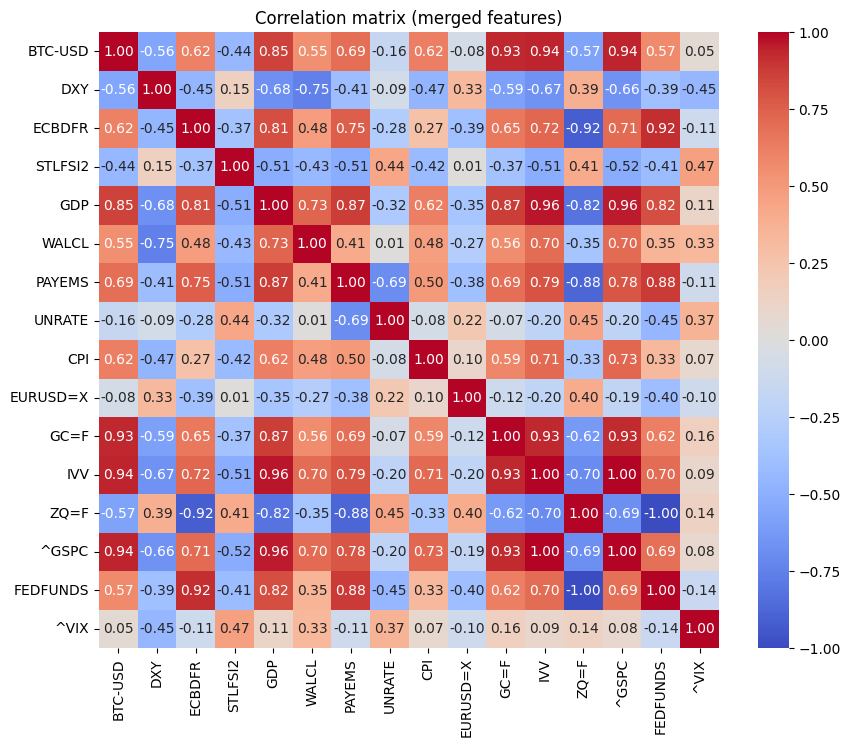

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# eksik değerlere bak
print("Columns and non-null counts:")
print(merged_final.count())

# numeric only for correlation
num = merged_final.select_dtypes(include=[np.number]).copy()
corr = num.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation matrix (merged features)")
plt.show()


In [ ]:
import pandas as pd
import numpy as np

from google.colab import drive
drive.mount('/content/drive')
# Merged dosyanı oku
merged_final = pd.read_csv("/content/drive/MyDrive/veri-madenciligi-projesi/notebooks/merged_data.csv")

# Tarih kolonunu düzeltme
merged_final['Date'] = pd.to_datetime(merged_final['Date'])
merged_final = merged_final.sort_values('Date')
merged_final = merged_final.set_index('Date')

# Eksik değerler
print("Eksik değerler (önce):")
print(merged_final.isnull().sum())

# Zaman serisi interpolasyonu
merged_final = merged_final.interpolate(method='linear')

# Baştaki ve sondaki boş değerler
merged_final = merged_final.ffill().bfill()

# Final kontrol
print("Eksik değerler (sonra):")
print(merged_final.isnull().sum())

# Temiz versiyon save
merged_final.to_csv("/content/drive/MyDrive/veri-madenciligi-projesi/merged_final_clean.csv")


Mounted at /content/drive
Eksik değerler (önce):
BTC-USD     0
DXY         0
ECBDFR      0
STLFSI2     0
GDP         0
WALCL       0
PAYEMS      0
UNRATE      0
CPI         0
EURUSD=X    0
GC=F        0
IVV         0
ZQ=F        0
^GSPC       0
FEDFUNDS    0
^VIX        0
dtype: int64
Eksik değerler (sonra):
BTC-USD     0
DXY         0
ECBDFR      0
STLFSI2     0
GDP         0
WALCL       0
PAYEMS      0
UNRATE      0
CPI         0
EURUSD=X    0
GC=F        0
IVV         0
ZQ=F        0
^GSPC       0
FEDFUNDS    0
^VIX        0
dtype: int64


In [ ]:
import pandas as pd
import numpy as np

#  Dosyayı oku
path = "/content/drive/MyDrive/veri-madenciligi-projesi/merged_final_clean.csv"
df = pd.read_csv(path)

df["Date"] = pd.to_datetime(df["Date"])
df = df.sort_values("Date").reset_index(drop=True)

# Target kolonları
df["Target_1d"] = df["BTC-USD"].shift(-1)
df["Target_7d"] = df["BTC-USD"].shift(-7)
df["Target_30d"] = df["BTC-USD"].shift(-30)
df["Target_365d"] = df["BTC-USD"].shift(-365)

#Lag'lerin sayısı
lags = [1, 3, 7, 30, 90, 365]

#Tüm kolonlara gecikme ekleme
cols = [c for c in df.columns if c not in ["Date", "Target_1d", "Target_7d", "Target_30d", "Target_365d"]]

for col in cols:
    for lag in lags:
        df[f"{col}_lag{lag}"] = df[col].shift(lag)

# Son satırlardaki NaN'ların temizlenmesi
df = df.dropna().reset_index(drop=True)

# Yeni dataset save
output_path = "/content/drive/MyDrive/veri-madenciligi-projesi/merged_with_lags.csv"
df.to_csv(output_path, index=False)

print("Yeni dosya kaydedildi:")
print(output_path)
print("\nÖrnek satırlar:")
print(df.head())


/tmp/ipython-input-1089365819.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"{col}_lag{lag}"] = df[col].shift(lag)
/tmp/ipython-input-1089365819.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"{col}_lag{lag}"] = df[col].shift(lag)


Bitti! Yeni dosya kaydedildi:
/content/drive/MyDrive/veri-madenciligi-projesi/merged_with_lags.csv

Örnek satırlar:
        Date     BTC-USD          DXY  ECBDFR  STLFSI2        GDP      WALCL  \
0 2015-09-15  230.304001   991.849976    -0.2   0.1111  18401.626  4478213.0   
1 2015-09-16  229.091003   982.549988    -0.2   0.1111  18401.626  4487809.0   
2 2015-09-17  229.809998   991.849976    -0.2   0.1111  18401.626  4487809.0   
3 2015-09-18  232.975006  1039.979980    -0.2   0.1236  18401.626  4487809.0   
4 2015-09-19  231.492996  1039.979980    -0.2   0.1236  18401.626  4487809.0   

     PAYEMS  UNRATE        CPI  ...  FEDFUNDS_lag7  FEDFUNDS_lag30  \
0  142275.0     5.0  23.511166  ...           0.14            0.14   
1  142275.0     5.0  23.466616  ...           0.14            0.14   
2  142275.0     5.0  23.573530  ...           0.14            0.14   
3  142275.0     5.0  23.573530  ...           0.14            0.14   
4  142275.0     5.0  23.573530  ...           0.14   